In [2]:
import matplotlib.pyplot as plt
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift
from scipy.special import expit

In this markdown I will look into how the diffusion coefficient affects the invariant density and expected hitting times.
The diffusion coefficient is subject to the constraints:
$$
\underset{\bar{}}{v} \leq |\sigma(x)| \leq \bar{v}, \, \forall x\in \mathbb{R} \quad \text{where } \underset{\bar{}}{v},\bar{v} \in (0, \infty)\\
\forall |x| > A: \frac{b(x)}{\sigma^2(x)}sgn(x) \leq -\gamma, \quad \text{for some } A,\gamma > 0
$$

# Constant diffusion coefficcient

Firstly, we will see how an increasing constant diffusion coefficient will affect the process. Using a linear drift function of the form $b(x) = -Cx$ with $C=4$ and different constant diffusion coefficient will then correspond to variations of the Ornstein-Uhlenbeck process. To see how different constant diffusion coefficient affect the invariant density and expected hitting times we will look at diffusion coefficients of the form:
$$
\sigma_1(x) = c, \quad \text{for } c\in \{1/2, 1, 2, 4\}
$$
We only consider positive constants, since negative values will have the same affect as their positive counterpart, as the diffusion coefficient is squared everywhere in the invariant density.

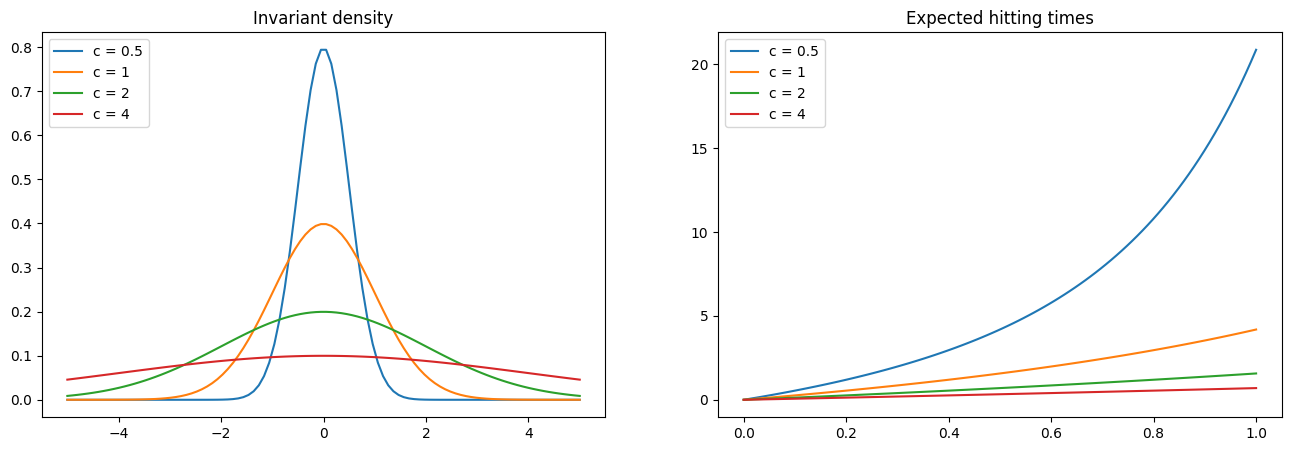

In [2]:
def sigma1(c):
    return lambda x: c

cs = [1/2, 1, 2, 4]
sigmas = [sigma1(c) for c in cs]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"c = {cs[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"c = {cs[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

Here we see that a constant diffusion coefficient has the inverse effect on the invariant density and therefore also on the expected hitting times compared to the slope coefficient for the drift function. As the diffusion coefficient decreases then the invariant density becomes more centered around 0, which means that the expected hitting times are increasing earlier and much faster. The slope coefficient on the drift function had the same effect, but here the effect was realized, when the slope coefficient increased. We would therefore not expected to see any new behaviour by having an a varying constant diffusion coefficient.

# Non-constant diffusion coefficient

Because of the constaint $\underset{\bar{}}{v} \leq |\sigma(x)| \leq \bar{v}, \, \forall x\in \mathbb{R}$ then we need the diffusion coefficient to be bounded and can therefore not use a linear diffusion coefficient unless we bound its range to some interval and let it be constant outside the interval. Therefore we will consider a diffusion coefficient of the form:
$$
\sigma_2(x) = \begin{cases}
    c\cdot A+c & x< -A\\
    c\cdot |x|+c & -A \leq x \leq A\\
    c\cdot A+c & x>A
\end{cases}, \quad \text{for } c\in \{1/2, 1, 2, 4\} \text{ and } A=1/2
$$
using the same drift function as before. The reason that we are adding the intercept is to avoid $\sigma(0)=0$, as this would not be allowed within the constraint.

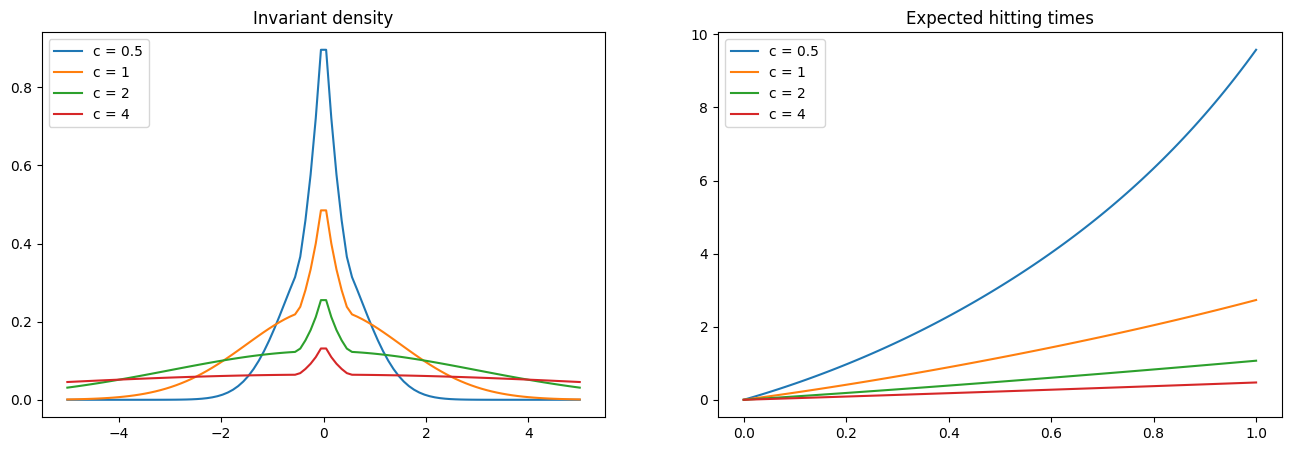

In [4]:
def sigma2(c, A):
    return lambda x: c*A+c if x < -A else (c*np.abs(x)+c if x <= A else c*A+c)

cs = [1/2, 1, 2, 4]
sigmas = [sigma2(c, 1/2) for c in cs]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"c = {cs[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"c = {cs[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

[]

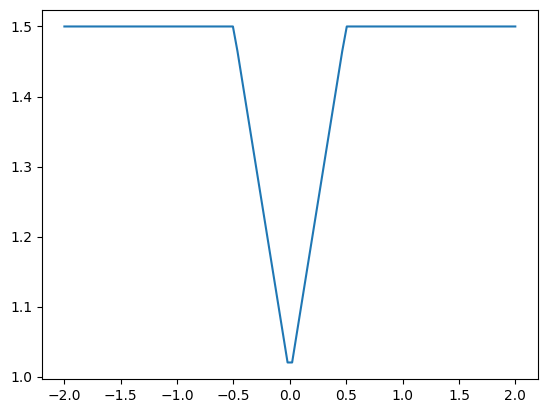

In [5]:
sig = sigma2(1, 0.5)

vals = np.linspace(-2,2,100)
y = [sig(v) for v in vals]

plt.plot(vals, y)
plt.plot()

# Non-linear diffusion coefficient

Lets see how non-linear diffusion coefficients changes the invariant density and the expected hitting times

We will start with a diffusion coefficient of the form:
$$
\sigma_3(x) = \begin{cases}
    \exp(A) & x < -A \\
    \exp(-x) & -A \leq x \leq 0\\
    \exp(x) & 0 < x \leq A \\
    \exp(A) & A < x
\end{cases}
$$
where we will try $A\in \{0.1, 0.5, 1\}$

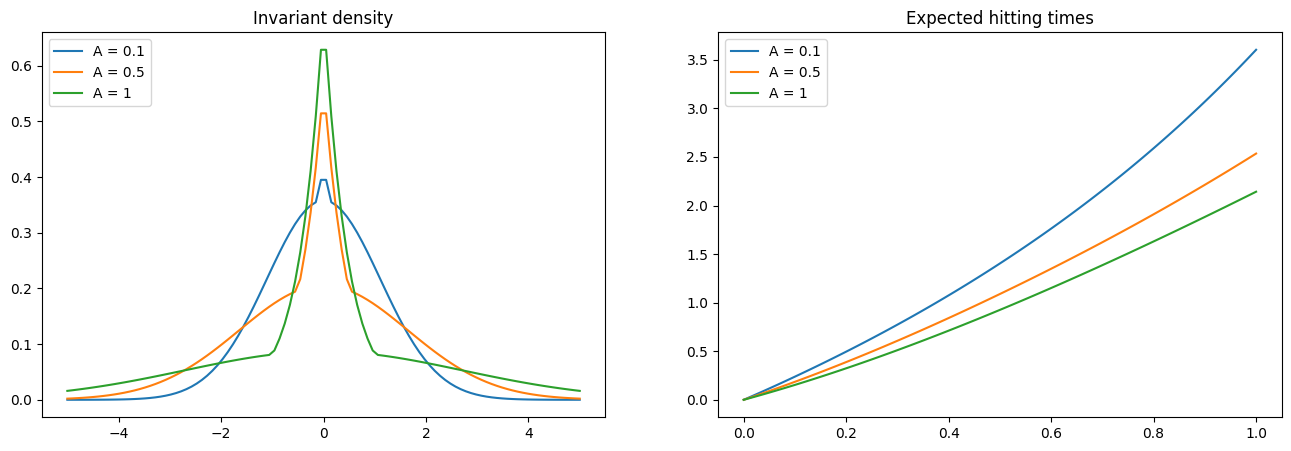

In [3]:
def sigma3(A):
    return lambda x: np.exp(A) if x < -A else (np.exp(-x) if x <= 0 else (np.exp(x) if x <= A else np.exp(A)))

As = [0.1, 0.5, 1]
sigmas = [sigma3(A) for A in As]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

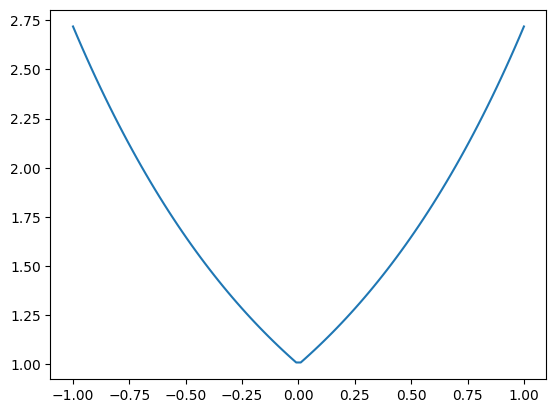

In [7]:
def sigma3(A):
    return lambda x: np.exp(A) if x < -A else (np.exp(-x) if x <= 0 else (np.exp(x) if x <= A else np.exp(A)))

s = sigma3(2)
vals = np.linspace(-1,1, 100)
ys = [s(v) for v in vals]
plt.plot(vals, ys)
plt.show()

Next we try another non-linear diffusion coefficient of the form
$$
\sigma_4(x) = \begin{cases}
    \frac{1}{A} & -A \leq x \leq A \\
\frac{1}{|x|} & else
\end{cases}
$$

NOTE: Need to make sure that it can never be 0, so should have some bound such that we do not end up with $1/|x| = 0$

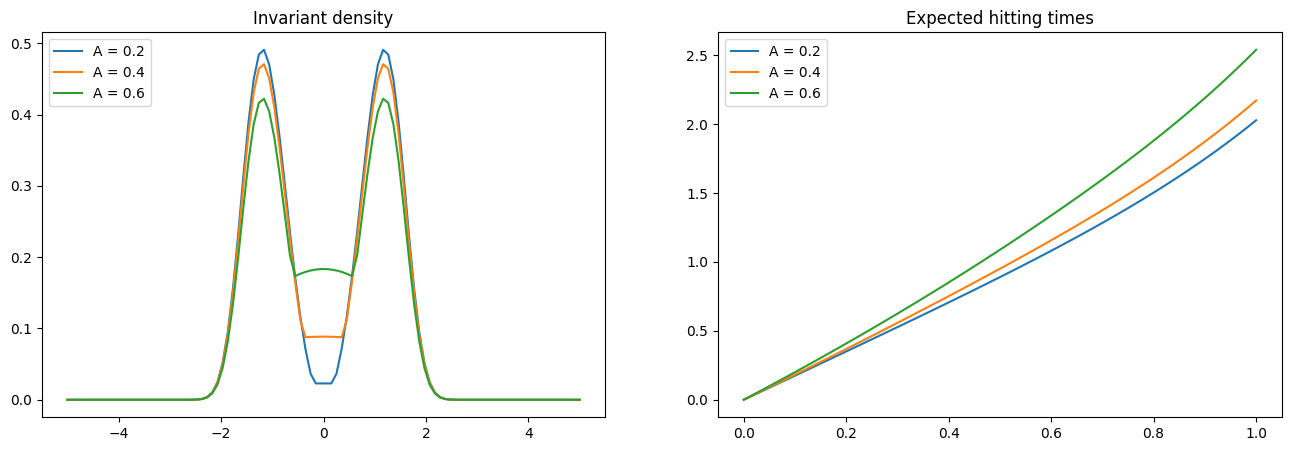

In [39]:
def sigma4(A):
    return lambda x: 1/A if -A <= x and x <= A else (1/np.abs(x) if np.abs(x) < 100 else 1/100)

As = [0.2, 0.4, 0.6]
sigmas = [sigma4(A) for A in As]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

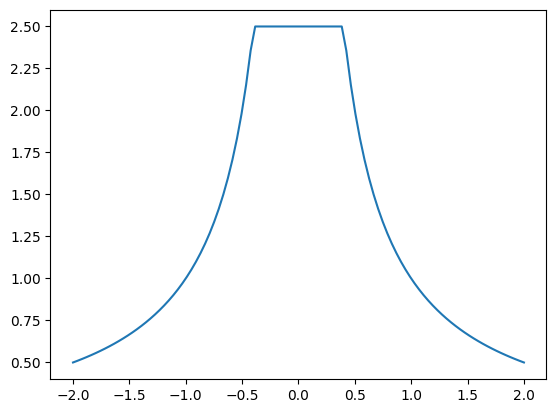

In [36]:
def sigma4(A):
    return lambda x: 1/A if -A <= x and x <= A else (1/np.abs(x) if np.abs(x) < 10 else 1/10)


s = sigma4(0.4)
vals = np.linspace(-2,2, 100)
ys = [s(v) for v in vals]
plt.plot(vals, ys)
plt.show()

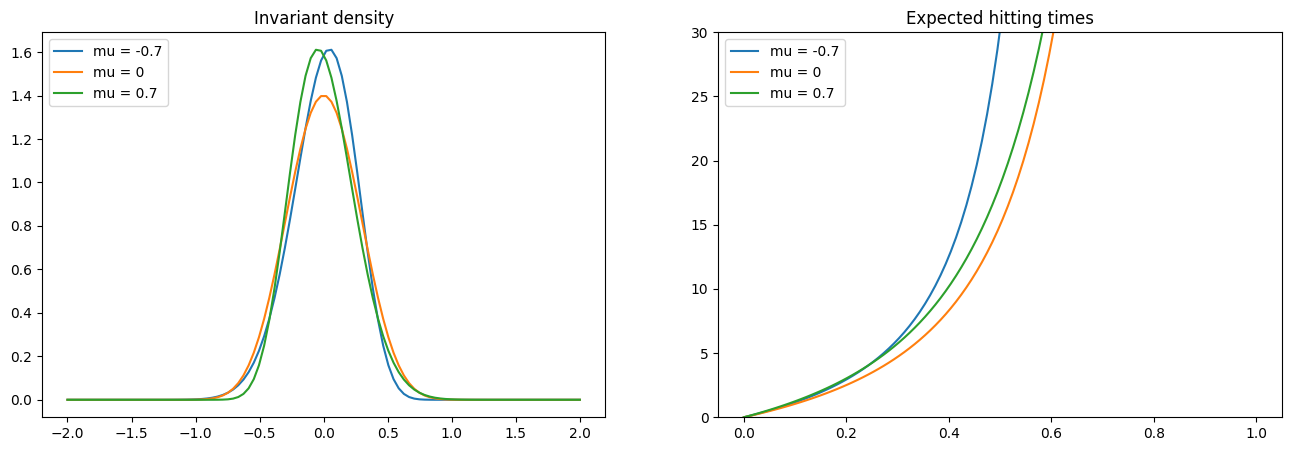

In [14]:
def sigma5(mu):
    return lambda x: 1/(np.sqrt(2*2*np.pi))*np.exp(-1/2 * ((x-mu)/np.sqrt(2))**2) if -2*np.sqrt(2)+mu <= x and x <= 2*np.sqrt(2)+mu else 1/(np.sqrt(2*2*np.pi))*np.exp(-1/2 * (2/np.sqrt(2))**2)

mus = [-0.7, 0, 0.7]
sigmas = [sigma5(mu) for mu in mus]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-2, 2, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"mu = {mus[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"mu = {mus[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
ax[1].set_ylim([0, 30])
plt.show()

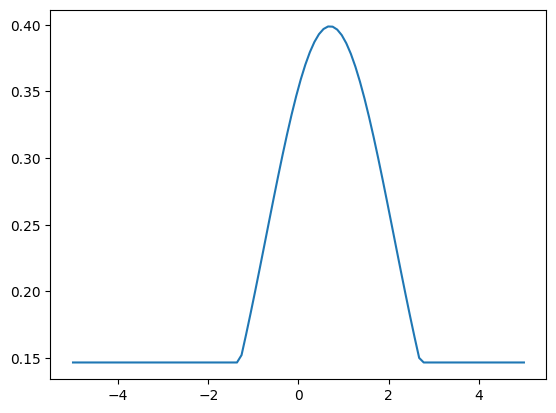

In [12]:
def sigma5(mu):
    return lambda x: 1/(np.sqrt(2*2*np.pi))*np.exp(-1/2 * ((x-mu)/np.sqrt(2))**2) if -2+mu <= x and x <= 2+mu else 1/(np.sqrt(2*2*np.pi))*np.exp(-1/2 * (2/np.sqrt(2))**2)

s = sigma5(0.7)
vals = np.linspace(-5,5, 100)
ys = [s(v) for v in vals]
plt.plot(vals, ys)
plt.show()

# Using sigmoid function

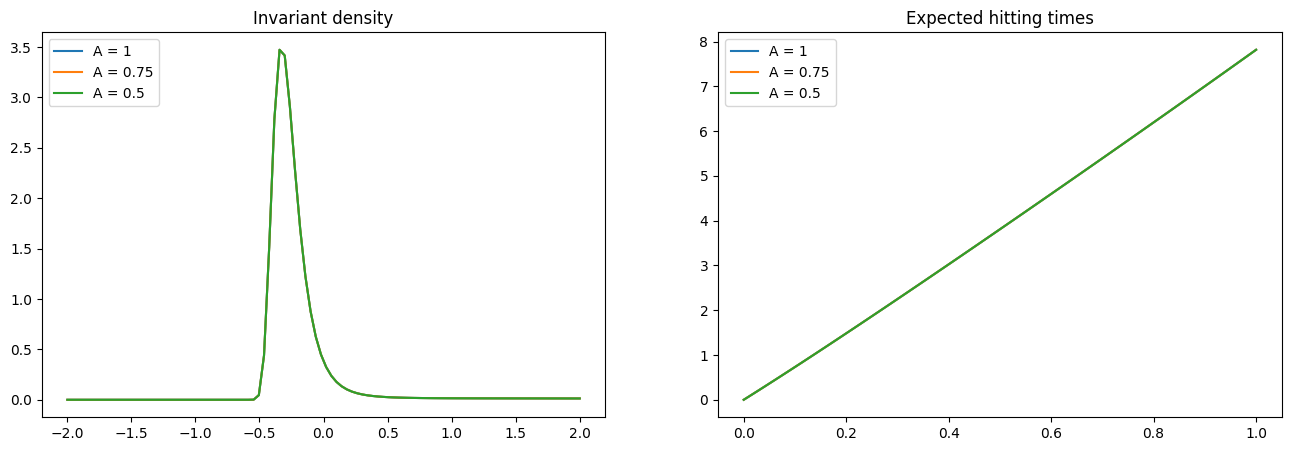

In [29]:
def sigma6(A):
    return lambda x: 1/(1/4+np.exp(-5*x)) if x > -A else 1/(1/4+np.exp(5*A))

As = [1, 0.75, 0.5]
sigmas = [sigma6(A) for A in As]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-2, 2, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

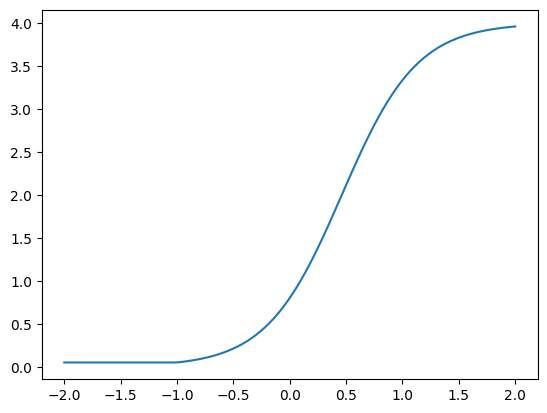

In [11]:
def sigma6(A):
    return lambda x: 1/(1/4+np.exp(-3*x)) if x > -A else 1/(1/4+np.exp(3*A))

sig = sigma6(1)

vals = np.linspace(-2, 2, 100)
ys = [sig(x) for x in vals]
plt.plot(vals, ys)
plt.show()

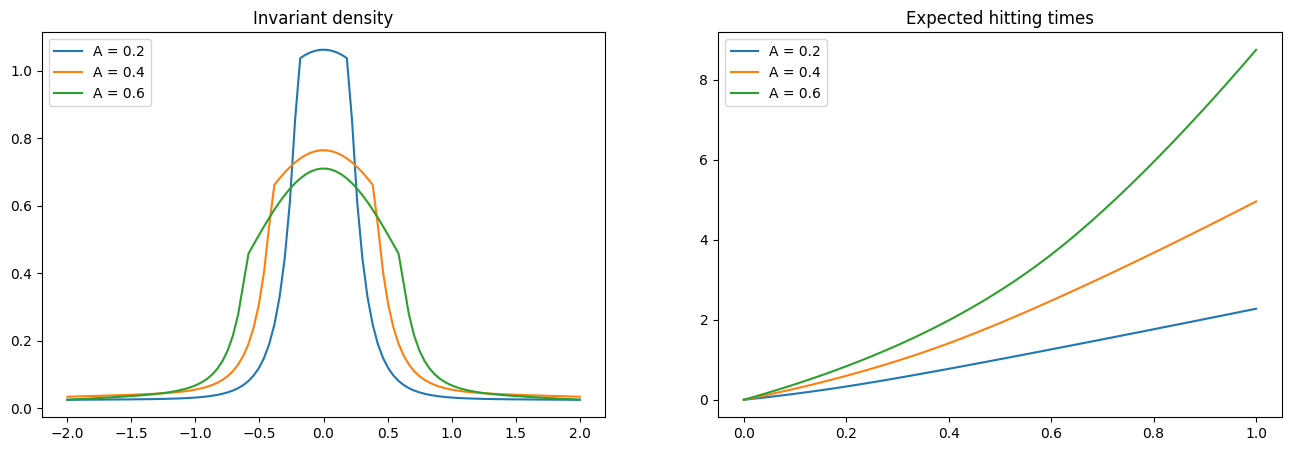

In [40]:
def sigma7(A):
    return lambda x: 1/(A+np.exp(5*(x+A))) if x <= -A else (1/(A+np.exp(-5*(x-A))) if x >= A else 1/(A+1))

As = [0.2, 0.4, 0.6]
sigmas = [sigma7(A) for A in As]

d = generate_linear_drift(1/2, 0)

diffProsses = [DiffusionProcess(d, sig) for sig in sigmas]

x_range_invariant = np.linspace(-2, 2, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 30])
plt.show()

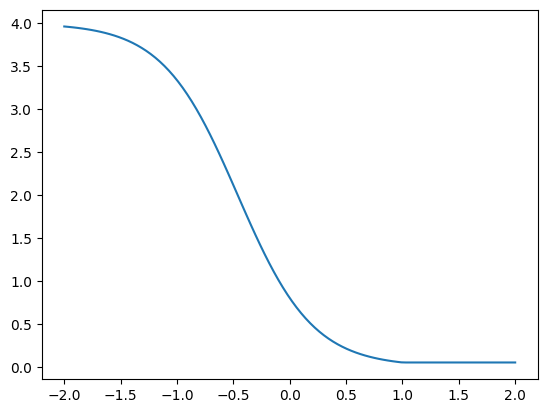

In [14]:
def sigma7(A):
    return lambda x: 1/(1/4+np.exp(3*x)) if x < A else 1/(1/4+np.exp(3*A))

sig = sigma7(1)

vals = np.linspace(-2, 2, 100)
ys = [sig(x) for x in vals]
plt.plot(vals, ys)
plt.show()

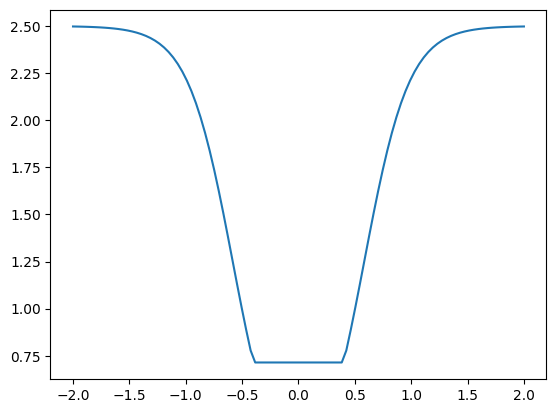

In [46]:
def sigma7(A):
    return lambda x: 1/(A+np.exp(5*(x+A))) if x <= -A else (1/(A+np.exp(-5*(x-A))) if x >= A else 1/(A+1))

sig = sigma7(0.4)

vals = np.linspace(-2, 2, 100)
ys = [sig(x) for x in vals]
plt.plot(vals, ys)
plt.show()

In [41]:
sig(0.7)

1.6048011538420792